In [109]:
#data exploration&manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns
import pandas_profiling as pp
import joblib

import datetime as dt
import os
import matplotlib.pyplot as plt

#ML Models search and optimisation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import GridSearchCV
#from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

#Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K




%matplotlib inline

# Neural Networks with Keras

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K


In [121]:
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical


In [122]:
  
# Import space_X_train.csv
import pandas as pd
space_X_train = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_train.csv', index_col=0)

In [123]:
space_X_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [124]:
list(space_X_train.columns)

['sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'target']

In [125]:
features = list(space_X_train.columns)
features.pop()

'target'

In [126]:
print (features)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']


In [127]:
x = space_X_train.drop('target',axis=1).values #returns a numpy array
numerical_cols=['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
space_X_train_min_max_scaled = pd.DataFrame(x_scaled)

scaler = preprocessing.RobustScaler()
space_X_train_robust = scaler.fit_transform(x)
space_X_train_robust = pd.DataFrame(space_X_train_robust, columns =numerical_cols)

scaler = preprocessing.StandardScaler()
space_X_train_standard = scaler.fit_transform(x)
space_X_train_standard = pd.DataFrame(space_X_train_standard, columns =numerical_cols)

In [150]:
x = space_X_train.copy()
x.drop(["target"], 
            axis = 1,
            inplace=True
            )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x = pd.DataFrame(sc.fit_transform(x))
y = space_X_train["target"]
y_cat = to_categorical(y) #it is required this encoding for NN

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2, random_state=1,stratify=y)

In [152]:
y_cat

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [153]:
model = Sequential()
model.add(Dense(60, input_shape = (6,), activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(5, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["categorical_accuracy"])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 60)                420       
                                                                 
 dense_73 (Dense)            (None, 30)                1830      
                                                                 
 dropout_28 (Dropout)        (None, 30)                0         
                                                                 
 dense_74 (Dense)            (None, 5)                 155       
                                                                 
Total params: 2,405
Trainable params: 2,405
Non-trainable params: 0
_________________________________________________________________


In [154]:
import keras
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


nn_model_fitting = model.fit(x_train, y_train, verbose=1, epochs=50, validation_split=0.2,  callbacks=[es_callback])

Epoch 1/50
42/42 [==============================] - 1s 9ms/step - loss: 1.1432 - categorical_accuracy: 0.5618 - val_loss: 0.9781 - val_categorical_accuracy: 0.6190
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 0.8929 - categorical_accuracy: 0.6451 - val_loss: 0.8765 - val_categorical_accuracy: 0.6101
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 0.8452 - categorical_accuracy: 0.6622 - val_loss: 0.8271 - val_categorical_accuracy: 0.6667
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.7989 - categorical_accuracy: 0.6741 - val_loss: 0.8237 - val_categorical_accuracy: 0.6667
Epoch 5/50
42/42 [==============================] - 0s 6ms/step - loss: 0.7240 - categorical_accuracy: 0.7277 - val_loss: 0.7984 - val_categorical_accuracy: 0.6607
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 0.6968 - categorical_accuracy: 0.7195 - val_loss: 0.7896 - val_categorical_accuracy: 0.6726
Epoch 7/50
42/42

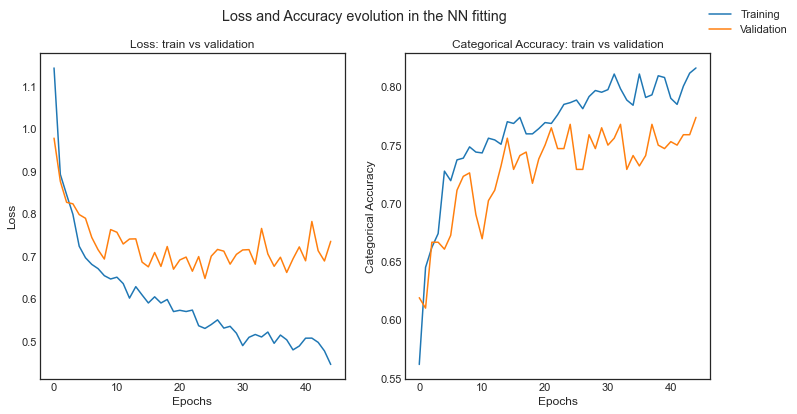

In [155]:
import matplotlib.style as style 
def plot_new_and_multiclassification_accuracy (nn_model_fitting):
    '''Funtion to plot loss and accuracy evolution along the model fitting of neuronal networks.
    
    Input: nn_model_fitting correspond to the fitting of the neuronal networks model sequential of Keras
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
 
    fig.suptitle('Loss and Accuracy evolution in the NN fitting')
 
    style.available
    palette = sns.color_palette("mako_r", 2)
    
    for y_axis in ['loss','categorical_accuracy']:
        val= 'val_'+ y_axis
        if y_axis =='loss':
            ax_def=axes[0]
            ylabel='Loss'
            title='Loss: train vs validation'
        elif y_axis =='categorical_accuracy':
            ax_def=axes[1]
            ylabel='Categorical Accuracy'
            title='Categorical Accuracy: train vs validation'
        sns.set_context("notebook")
        style.use('seaborn-white')    
        sns.lineplot(ax=ax_def, 
                    x=range(0,len(nn_model_fitting.history[y_axis])),
                    y=nn_model_fitting.history[y_axis], 
                    palette=palette
                    )
        plot_new = sns.lineplot(ax=ax_def, 
                            x=range(0,len(nn_model_fitting.history[y_axis])), 
                            y=nn_model_fitting.history[val], 
                            palette=palette 
                            )
        plot_new.set_xlabel('Epochs')
        plot_new.set_ylabel(ylabel)
        plot_new.set_title(title)
    fig.legend(labels=["Training","Validation"])

plot_new_and_multiclassification_accuracy (nn_model_fitting)


After playing with layers and nodes, no improvement regarding the best f1_macro socre from Random Forest was obtainef. Besides, previous Loss graph point some overfitting in the model. The Neuronal Network model was discarded. 